In [4]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# suicide rates: https://catalog.data.gov/dataset/death-rates-for-suicide-by-sex-race-hispanic-origin-and-age-united-states-020c1
# overdose rates: https://catalog.data.gov/dataset/drug-overdose-death-rates-by-drug-type-sex-age-race-and-hispanic-origin-united-states-3f72f
# both has number / 100,000

# import suicide rates
df = pd.read_csv('suicide_rates.csv')
df = df[df['UNIT']=='Deaths per 100,000 resident population, age-adjusted']

df_less = df.drop(columns=['INDICATOR', 'UNIT', 'STUB_NAME','YEAR_NUM', 'AGE','FLAG', 'UNIT_NUM'])
df_sex_race = df_less[(df_less['STUB_NAME_NUM']==4) & (df_less['YEAR']>=1999)] # view rates only by sex and race
df_sex_race.reset_index(inplace=True)
# male: race
df_male_white = df_sex_race[df_sex_race['STUB_LABEL']=='Male: White']
df_male_black = df_sex_race[df_sex_race['STUB_LABEL']=='Male: Black or African American']
df_male_asian = df_sex_race[df_sex_race['STUB_LABEL']=='Male: Asian or Pacific Islander']
df_male_native = df_sex_race[df_sex_race['STUB_LABEL']=='Male: American Indian or Alaska Native']
df_male_black.reset_index(inplace=True)

In [10]:
df2.head()

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN
1,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1960,2,All ages,0.0,12.5,NaN
2,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1970,3,All ages,0.0,13.1,NaN
3,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1980,4,All ages,0.0,12.2,NaN
4,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1981,5,All ages,0.0,12.3,NaN


In [11]:
#####################################################################

# import overdose death rates
df2 = pd.read_csv('overdose_rates.csv')
df2 = df2[(df2['UNIT']=='Deaths per 100,000 resident population, age-adjusted') & (df2['STUB_LABEL_NUM']==4.12) & (df2['STUB_NAME']=='Sex and race')]
df2_less = df2.drop(columns=['INDICATOR', 'UNIT', 'STUB_NAME','YEAR_NUM', 'AGE','FLAG', 'UNIT_NUM'])
df2_sex_race = df2_less[(df2_less['STUB_NAME_NUM']==4) & (df2_less['YEAR']>=1999)] # view rates only by sex and gender
df2_sex_race.reset_index(inplace=True)



/home/omar/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Correlation Between Age-adjusted Suicide Rates and Overdose Rates in African-American males per 100,000 Resident')

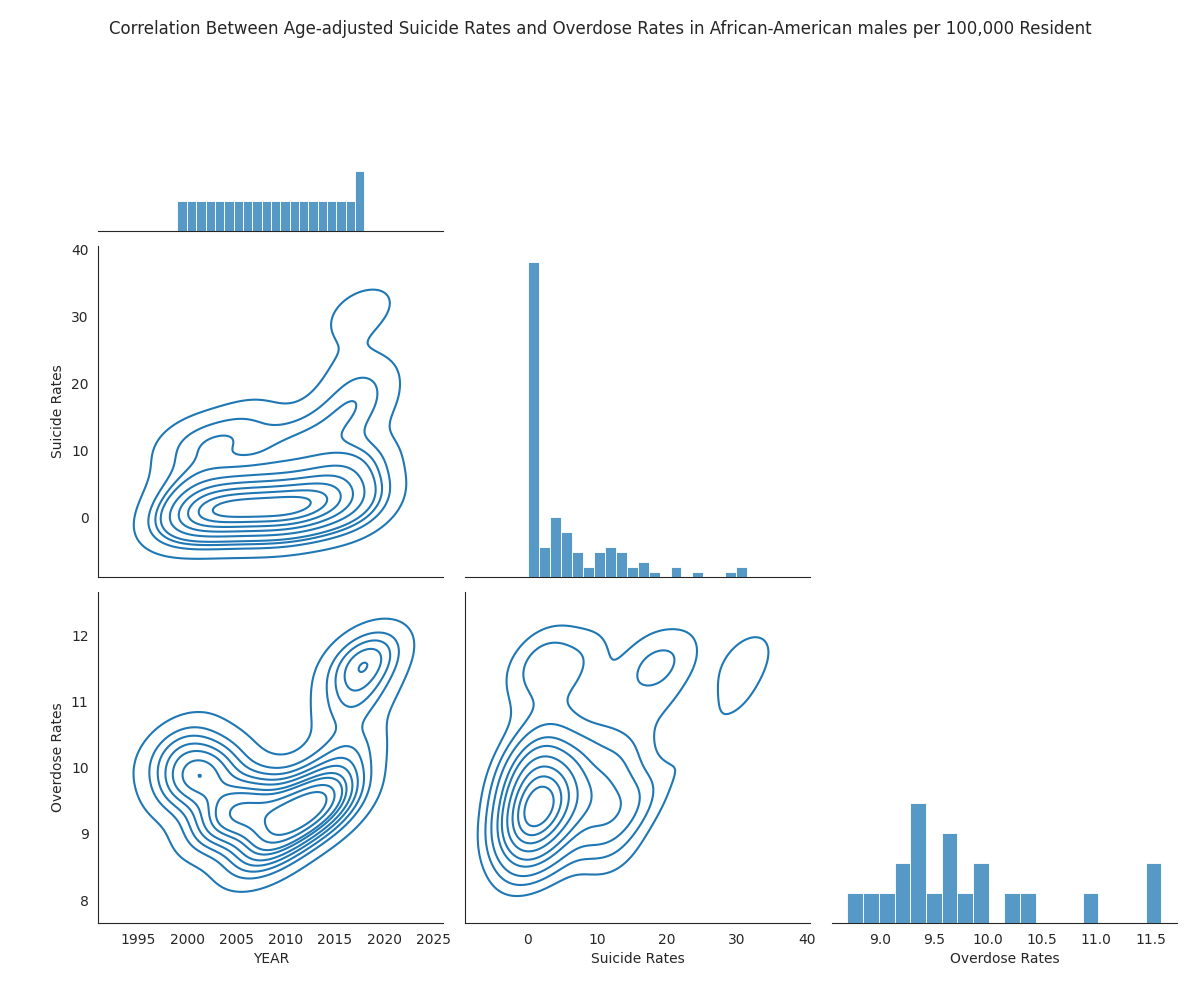

In [12]:
# male: race
df2_male_white = df2_sex_race[df2_sex_race['STUB_LABEL']=='Male: White']
df2_male_black = df2_sex_race[df2_sex_race['STUB_LABEL']=='Male: Black or African American']
df2_male_asian = df2_sex_race[df2_sex_race['STUB_LABEL']=='Male: Asian or Pacific Islander']
df2_male_native = df2_sex_race[df2_sex_race['STUB_LABEL']=='Male: American Indian or Alaska Native']
df2_male_black.reset_index(inplace=True)

# the goal is to see the correlation between suicide rates and drug overdose in the population of african american men
combined_data = pd.merge(df_male_black[['YEAR', 'ESTIMATE']], df2_male_black[['YEAR','ESTIMATE']], on='YEAR', suffixes=('_suicide', '_overdose'))
combined_data.rename(columns={'ESTIMATE_suicide':'Suicide Rates', 'ESTIMATE_overdose':'Overdose Rates'}, inplace=True)
#combined_data.reset_index(inplace=True)

#fig, ax = plt.subplots(figsize=(5*1.6,5))
sns.set_style('white')
g=sns.pairplot(combined_data, kind='kde', diag_kind='hist',diag_kws={'bins': 20}, corner=True);
g.tight_layout()
g.fig.set_size_inches(12, 10)
plt.subplots_adjust(top=1.1)
plt.suptitle('Correlation Between Age-adjusted Suicide Rates and Overdose Rates in African-American males per 100,000 Resident')